In [85]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/winequalityN.csv')

df = df[df['type'] == 'red']
df = df.drop(columns=['type'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Checking for data quality issues

In [86]:
df.isnull().sum()

fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [87]:
df.dropna(inplace=True)

In [88]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,8.326365,0.527659,0.271551,2.538512,0.087497,15.841808,46.463905,0.996752,3.310590,0.657866,10.419617,5.636535
std,1.740681,0.179297,0.194843,1.412061,0.047134,10.436038,32.913696,0.001888,0.154305,0.169716,1.065206,0.807687
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997850,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualizing the data

<Axes: xlabel='quality'>

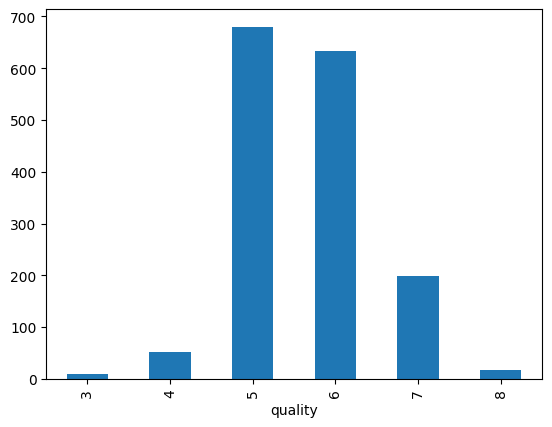

In [89]:
df['quality'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='quality'>

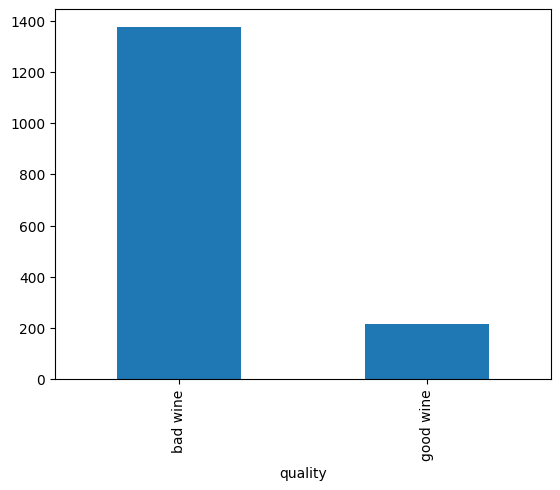

In [90]:
# plot good vs bad wine

df['quality'] = df['quality'].apply(lambda x: "good wine" if x >= 7 else "bad wine")

df['quality'].value_counts().sort_index().plot(kind='bar')

### Check for correlation in the data

<Axes: >

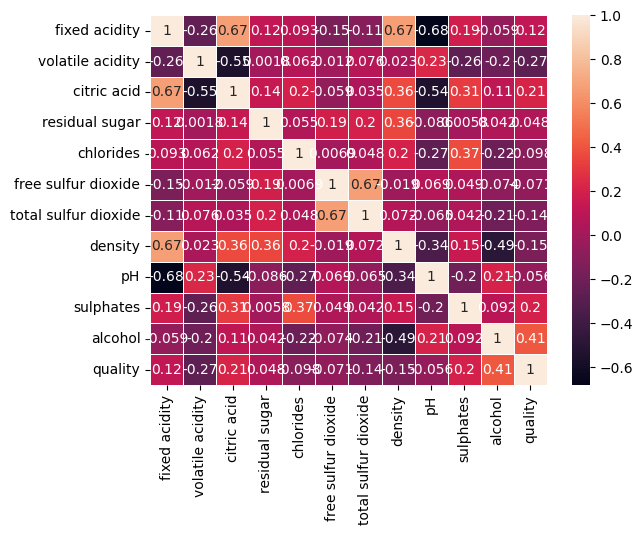

In [91]:
df_corr = df

df_corr['quality'] = df_corr['quality'].apply(lambda x: 1 if x == "good wine" else 0)
sns.heatmap(df_corr.corr(), annot=True, linewidths=.5)

We see that quality is correlated with alcohol, volatile acidity, citric acid and sulphates. We will use these features to predict quality.

### Train a model - Linear Regression

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# create model
log_reg = LogisticRegression()

# train model
log_reg.fit(x_train, y_train)

# predict on test data
y_pred = log_reg.predict(x_test)

# check accuracy
accuracy_score(y_test, y_pred)

0.8683385579937304

### Train a model - Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 

# define x and y (features and target)
x = df_corr[['alcohol', 'sulphates', 'citric acid', 'volatile acidity']]
y = df_corr['quality']

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
clf.fit(x_train, y_train) 

# performing predictions on the test dataset 
y_pred = clf.predict(x_test) 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 


ACCURACY OF THE MODEL:  0.9059561128526645


Random Forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

### Train a model - Gradient Boosting

### Train a model - SVM